In [2]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score
df =pd.read_csv("ebay_iphone.csv")
df.drop(columns="Name",inplace=True)
for col in df:
    print(df[col].value_counts())

Seller
firma       535
prywatny    405
Name: count, dtype: int64
Condition
Używany             642
Tylko na części     120
Fabrycznie nowy      65
Odnowiony            60
Nowy (inny)          53
Name: count, dtype: int64
Price
906.199394     16
759.140000     10
795.140000     10
699.250000      9
799.140000      8
               ..
695.250000      1
1490.400000     1
4.990000        1
2313.510000     1
21.500000       1
Name: count, Length: 595, dtype: int64
Shipping Cost
0.00      47
64.51     24
86.02     15
62.32     14
85.98     13
          ..
97.00      1
124.67     1
90.32      1
139.25     1
77.76      1
Name: count, Length: 531, dtype: int64
Shipping Country
Stany Zjednoczone    499
Wielka Brytania      150
Niemcy               141
Włochy                66
Chiny                 26
Polska                13
Francja                9
Kanada                 8
Litwa                  5
Austria                5
Szwajcaria             4
Japonia                4
Hongkong               

## Tworzenie kategorii USA

In [3]:
df["Shipping Country"] = df["Shipping Country"].apply(lambda x : x.strip())
df["USA"] = df["Shipping Country"].apply(lambda x : 1 if str(x) =="Stany Zjednoczone" else 0)
df.drop(columns="Shipping Country",inplace=True)
df

,Seller,Condition,Price,Shipping Cost,Free Return,Last Item,Best Seller,Buy Now,Generation,USA
0,prywatny,Używany,576.33,62.32,False,False,False,False,13,0
1,prywatny,Używany,950.00,0.00,False,False,False,False,12,0
2,firma,Używany,4.95,74.01,False,False,False,False,12,0
3,firma,Tylko na części,19.35,64.30,False,False,False,False,12,0
4,prywatny,Tylko na części,200.00,0.00,False,False,False,False,11,0
...,...,...,...,...,...,...,...,...,...,...
935,prywatny,Używany,49.43,75.96,False,False,False,False,4,0
936,firma,Używany,898.83,107.80,False,False,True,False,12,1
937,prywatny,Tylko na części,199.90,164.87,False,False,False,False,8,0
938,prywatny,Używany,149.93,73.02,False,False,False,False,5,0


### Zamiana wartości liczbowych na Price i  Shipping Cost na High, Medium ,Low

In [4]:
df["Price_Height"] = df["Price"].apply(lambda x: "High" if x > 2000 else "Medium" if x > 500 else "Low" )
df["Shipping_Height"] = df["Shipping Cost"].apply(lambda x: "High" if x > 125 else "Medium" if x > 50 else "Low" )
df.drop(columns=["Price","Shipping Cost"],inplace=True)
df

,Seller,Condition,Free Return,Last Item,Best Seller,Buy Now,Generation,USA,Price_Height,Shipping_Height
0,prywatny,Używany,False,False,False,False,13,0,Medium,Medium
1,prywatny,Używany,False,False,False,False,12,0,Medium,Low
2,firma,Używany,False,False,False,False,12,0,Low,Medium
3,firma,Tylko na części,False,False,False,False,12,0,Low,Medium
4,prywatny,Tylko na części,False,False,False,False,11,0,Low,Low
...,...,...,...,...,...,...,...,...,...,...
935,prywatny,Używany,False,False,False,False,4,0,Low,Medium
936,firma,Używany,False,False,True,False,12,1,Medium,Medium
937,prywatny,Tylko na części,False,False,False,False,8,0,Low,High
938,prywatny,Używany,False,False,False,False,5,0,Low,Medium


## Transformacja wartości Generation na osobne kolumny w zalężności od wartości

In [5]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse_output=False)
one_hot_encoded = enc.fit_transform(df[["Generation"]])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=enc.get_feature_names_out(["Generation"]))

df = df.merge(one_hot_df,left_index=True, right_index=True)
df.drop(columns="Generation",inplace=True)
df

,Seller,Condition,Free Return,Last Item,Best Seller,Buy Now,USA,Price_Height,Shipping_Height,Generation_1,...,Generation_6s,Generation_7,Generation_8,Generation_se,Generation_specimen,Generation_x,Generation_xr,Generation_xs,Generation_ze,Generation_nan
0,prywatny,Używany,False,False,False,False,0,Medium,Medium,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,prywatny,Używany,False,False,False,False,0,Medium,Low,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,firma,Używany,False,False,False,False,0,Low,Medium,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,firma,Tylko na części,False,False,False,False,0,Low,Medium,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,prywatny,Tylko na części,False,False,False,False,0,Low,Low,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,prywatny,Używany,False,False,False,False,0,Low,Medium,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
936,firma,Używany,False,False,True,False,1,Medium,Medium,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
937,prywatny,Tylko na części,False,False,False,False,0,Low,High,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
938,prywatny,Używany,False,False,False,False,0,Low,Medium,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Sprawdzenie korelacji i zakodowanie zmiennych kategorycznych

<Axes: >

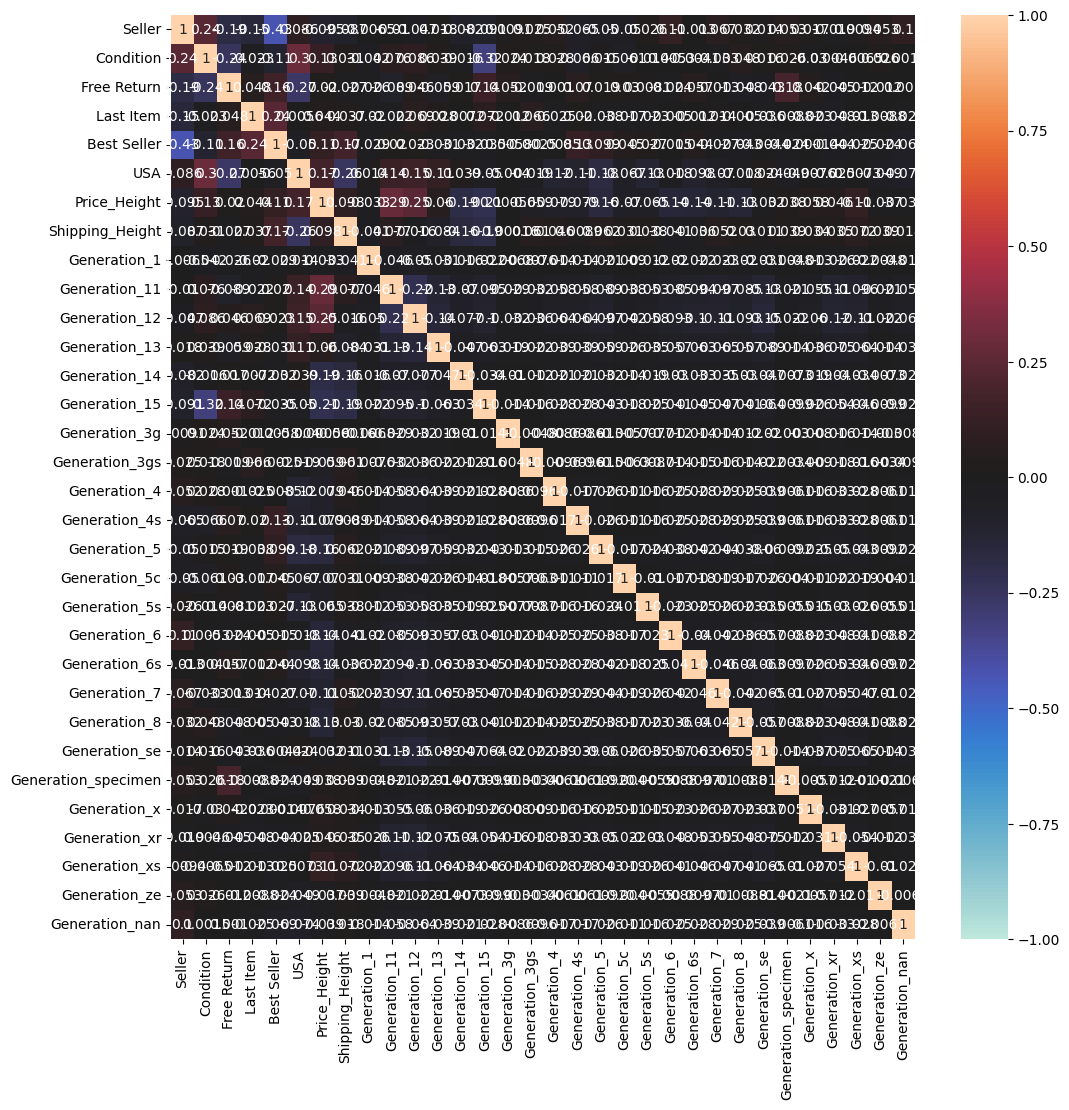

In [15]:
col_list_enc=df.columns.tolist()
#col_list_enc.remove("Condition")
col_list_enc

enc = OrdinalEncoder()
df[col_list_enc]=enc.fit_transform(df[col_list_enc])
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df[col_list_enc].corr(), annot=True, center=0.0,ax=ax,vmax=1,vmin=-1)

## Usuwanie wysoko skorelowanych atrybutów

In [7]:
df.drop(columns="Buy Now",inplace=True)

## Podział danych na treningowe, testowe i walidacyjne

In [8]:
X = df.drop(columns="Condition")
y = df["Condition"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 5)
X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.2,random_state=5)

## Tworzenie modeli

### Regresja logistyczna

In [9]:
lr= LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_valid)
print(classification_report(y_pred,y_valid)) 

                  precision    recall  f1-score   support

Fabrycznie nowy        0.14      0.50      0.22         2
    Nowy (inny)        0.00      0.00      0.00         0
      Odnowiony        0.07      0.50      0.12         2
Tylko na części        0.00      0.00      0.00         5
        Używany        0.95      0.70      0.80       142

        accuracy                           0.67       151
       macro avg       0.23      0.34      0.23       151
    weighted avg       0.90      0.67      0.76       151



c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

### KNN

In [10]:
from sklearn.preprocessing import StandardScaler
X_train_s = StandardScaler().fit_transform(X_train)
X_valid_s = StandardScaler().fit_transform(X_valid)
knn  = KNeighborsClassifier()
knn.fit(X_train_s,y_train)
y_pred = knn.predict(X_valid_s)
print(classification_report(y_pred,y_valid)) 

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Nie można odnaleźć określonego pliku
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(


                  precision    recall  f1-score   support

Fabrycznie nowy        0.14      0.33      0.20         3
    Nowy (inny)        0.18      0.33      0.24         6
      Odnowiony        0.00      0.00      0.00         2
Tylko na części        0.33      0.28      0.30        18
        Używany        0.88      0.75      0.81       122

        accuracy                           0.66       151
       macro avg       0.31      0.34      0.31       151
    weighted avg       0.76      0.66      0.70       151



  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


### Drzewo decyzyjne

In [11]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_valid)
print(classification_report(y_pred,y_valid)) 

                  precision    recall  f1-score   support

Fabrycznie nowy        0.43      0.60      0.50         5
    Nowy (inny)        0.27      0.38      0.32         8
      Odnowiony        0.50      0.54      0.52        13
Tylko na części        0.27      0.22      0.24        18
        Używany        0.83      0.80      0.82       107

        accuracy                           0.68       151
       macro avg       0.46      0.51      0.48       151
    weighted avg       0.69      0.68      0.68       151



### Las losoway

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_valid)
print(classification_report(y_pred,y_valid)) # 38,6

                  precision    recall  f1-score   support

Fabrycznie nowy        0.29      0.67      0.40         3
    Nowy (inny)        0.18      0.40      0.25         5
      Odnowiony        0.50      0.70      0.58        10
Tylko na części        0.27      0.24      0.25        17
        Używany        0.87      0.78      0.82       116

        accuracy                           0.70       151
       macro avg       0.42      0.56      0.46       151
    weighted avg       0.74      0.70      0.71       151



### Dokładność jest najlepsza dla regresji logistycznej

In [13]:
y_pred = lr.predict(X_test)
print(classification_report(y_pred,y_test)) 

                  precision    recall  f1-score   support

Fabrycznie nowy        0.44      0.78      0.56         9
    Nowy (inny)        0.00      0.00      0.00         1
      Odnowiony        0.00      0.00      0.00         1
Tylko na części        0.04      0.25      0.06         4
        Używany        0.98      0.71      0.82       173

        accuracy                           0.69       188
       macro avg       0.29      0.35      0.29       188
    weighted avg       0.92      0.69      0.78       188



In [14]:
import joblib 
joblib.dump(lr, 'condition_classifier.pkl')

['condition_classifier.pkl']